# 1. Importing Libraries and Dataset

In [102]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv("G:\study\Data Science - ICT\Competition\Covid Data\covid_19_india.csv")

In [3]:
df.shape

(18110, 9)

In [4]:
df

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30-01-2020,6:00 PM,Kerala,1,0,0.0,0.0,1
1,2,31-01-2020,6:00 PM,Kerala,1,0,0.0,0.0,1
2,3,01-02-2020,6:00 PM,Kerala,2,0,0.0,0.0,2
3,4,02-02-2020,6:00 PM,Kerala,3,0,0.0,0.0,3
4,5,03-02-2020,6:00 PM,Kerala,3,0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...
18105,18106,11-08-2021,8:00 AM,Telangana,-,-,638410.0,3831.0,650353
18106,18107,11-08-2021,8:00 AM,Tripura,-,-,77811.0,773.0,80660
18107,18108,11-08-2021,8:00 AM,Uttarakhand,-,-,334650.0,7368.0,342462
18108,18109,11-08-2021,8:00 AM,Uttar Pradesh,-,-,1685492.0,22775.0,1708812


The Dataset has 18110 rows and 9 columns

# 2. Data Preprocessing

### 2.1. Missing Value Handling

In [5]:
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       3
Deaths                      7
Confirmed                   0
dtype: int64

There are some missing values present in 'Cured' and 'Deaths' columns. Let's fill the values with zero.

In [6]:
df['Cured'] = df['Cured'].fillna(0)
df['Deaths'] = df['Deaths'].fillna(0)
df.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

Now no null values present.

### 2.2. Data Cleaning

In [7]:
df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

we don't need the "Time" and "Sno" column here as we are taking day values. So let's remove the column.

In [8]:
del df['Time']

In [10]:
del df["Sno"]

Now we have to filter the data by state and date.

In [11]:
df=df.groupby(['State/UnionTerritory','Date']).sum().reset_index()

In [12]:
df["State/UnionTerritory"].unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Bihar****',
       'Cases being reassigned to states', 'Chandigarh', 'Chhattisgarh',
       'Dadra and Nagar Haveli',
       'Dadra and Nagar Haveli and Daman and Diu', 'Daman & Diu', 'Delhi',
       'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh',
       'Himanchal Pradesh', 'Jammu and Kashmir', 'Jharkhand',
       'Karanataka', 'Karnataka', 'Kerala', 'Ladakh', 'Lakshadweep',
       'Madhya Pradesh', 'Madhya Pradesh***', 'Maharashtra',
       'Maharashtra***', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland',
       'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim',
       'Tamil Nadu', 'Telangana', 'Telengana', 'Tripura', 'Unassigned',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal'], dtype=object)

There are some mistakes in names. Let's edit it

In [13]:
df.loc[df["State/UnionTerritory"]=="Karanataka", "State/UnionTerritory"]="Karnataka"

In [14]:
df.loc[df["State/UnionTerritory"]=="Bihar****", "State/UnionTerritory"]="Bihar"

In [15]:
df.loc[df["State/UnionTerritory"]=="Maharashtra***", "State/UnionTerritory"]="Maharashtra"

In [16]:
df.loc[df["State/UnionTerritory"]=="Daman & Diu", "State/UnionTerritory"]="Dadra and Nagar Haveli and Daman and Diu"

In [17]:
df.loc[df["State/UnionTerritory"]=="Dadra and Nagar Haveli", "State/UnionTerritory"]="Dadra and Nagar Haveli and Daman and Diu"

In [18]:
df.loc[df["State/UnionTerritory"]=="Madhya Pradesh***", "State/UnionTerritory"]="Madhya Pradesh"

In [19]:
df.loc[df["State/UnionTerritory"]=="Himanchal Pradesh", "State/UnionTerritory"]="Himachal Pradesh"

In [20]:
df.loc[df["State/UnionTerritory"]=="Telangana", "State/UnionTerritory"]="Telengana"

In [22]:
df = df.loc[df["State/UnionTerritory"] != "Unassigned"]

In [23]:
df = df.loc[df["State/UnionTerritory"] != "Cases being reassigned to states"]

Now we are adding cumulative sum column for Confirmed, Deaths and Cured.

In [25]:
df['Cumsum_Confirmed'] = df['Confirmed'].cumsum()

In [26]:
df['Cumsum_Deaths'] = df['Deaths'].cumsum()

In [27]:
df['Cumsum_Cured'] = df['Cured'].cumsum()

In [28]:
df['Active'] = df['Cumsum_Confirmed'] - df['Cumsum_Deaths'] - df['Cumsum_Cured']

In [29]:
# adding a Date column
df["Date"] = pd.to_datetime(df["Date"])

In [30]:
# adding a Month column
df["Month"] = df["Date"].dt.month_name()

In [31]:
# adding a Year column
df["Year"] = df["Date"].dt.year

In [32]:
df

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,Cumsum_Confirmed,Cumsum_Deaths,Cumsum_Cured,Active,Month,Year
0,Andaman and Nicobar Islands,2021-01-01,4826.0,62.0,4945,4945,62.0,4.826000e+03,57.0,January,2021
1,Andaman and Nicobar Islands,2021-01-02,4928.0,62.0,4994,9939,124.0,9.754000e+03,61.0,January,2021
2,Andaman and Nicobar Islands,2021-01-03,4952.0,62.0,5020,14959,186.0,1.470600e+04,67.0,January,2021
3,Andaman and Nicobar Islands,2020-01-04,0.0,0.0,10,14969,186.0,1.470600e+04,77.0,January,2020
4,Andaman and Nicobar Islands,2021-01-04,4976.0,62.0,5083,20052,248.0,1.968200e+04,122.0,January,2021
...,...,...,...,...,...,...,...,...,...,...,...
18105,West Bengal,2020-07-31,46256.0,1536.0,67692,5448725362,73351234.0,5.043642e+09,331732296.0,July,2020
18106,West Bengal,2021-07-31,1497951.0,18128.0,1527250,5450252612,73369362.0,5.045140e+09,331743467.0,July,2021
18107,West Bengal,2020-08-31,130952.0,3176.0,159785,5450412397,73372538.0,5.045271e+09,331769124.0,August,2020
18108,West Bengal,2020-10-31,325888.0,6784.0,369671,5450782068,73379322.0,5.045597e+09,331806123.0,October,2020


In [33]:
df.describe()

,Cured,Deaths,Confirmed,Cumsum_Confirmed,Cumsum_Deaths,Cumsum_Cured,Active,Year
count,1.804700e+04,18047.000000,1.804700e+04,1.804700e+04,1.804700e+04,1.804700e+04,1.804700e+04,18047.000000
mean,2.796102e+05,4066.548734,3.020631e+05,2.573765e+09,3.272591e+07,2.385377e+09,1.556616e+08,2020.444838
std,6.157425e+05,10935.489348,6.570604e+05,1.671372e+09,2.385899e+07,1.538949e+09,1.088589e+08,0.496962
min,0.000000e+00,0.000000,0.000000e+00,4.945000e+03,6.200000e+01,4.826000e+03,5.700000e+01,2020.000000
25%,3.392000e+03,34.000000,4.387000e+03,1.084731e+09,1.165401e+07,1.021563e+09,5.151436e+07,2020.000000
50%,3.392400e+04,598.000000,4.026900e+04,2.505706e+09,2.616069e+07,2.326463e+09,1.530823e+08,2020.000000
75%,2.806790e+05,3669.500000,3.012805e+05,3.995775e+09,5.371173e+07,3.689063e+09,2.530003e+08,2021.000000
max,6.159676e+06,134201.000000,6.363442e+06,5.451333e+09,7.338900e+07,5.046125e+09,3.318185e+08,2021.000000


In [34]:
df1 = df

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   State/UnionTerritory  18047 non-null  object        
 1   Date                  18047 non-null  datetime64[ns]
 2   Cured                 18047 non-null  float64       
 3   Deaths                18047 non-null  float64       
 4   Confirmed             18047 non-null  int64         
 5   Cumsum_Confirmed      18047 non-null  int64         
 6   Cumsum_Deaths         18047 non-null  float64       
 7   Cumsum_Cured          18047 non-null  float64       
 8   Active                18047 non-null  float64       
 9   Month                 18047 non-null  object        
 10  Year                  18047 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(2)
memory usage: 1.7+ MB


### 2.3. Outlier Detection and Handling

In [36]:
df.columns

Index(['State/UnionTerritory', 'Date', 'Cured', 'Deaths', 'Confirmed',
       'Cumsum_Confirmed', 'Cumsum_Deaths', 'Cumsum_Cured', 'Active', 'Month',
       'Year'],
      dtype='object')

In [37]:
cont_num = ['Cured','Deaths', 'Confirmed']

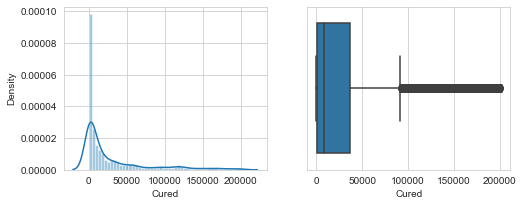

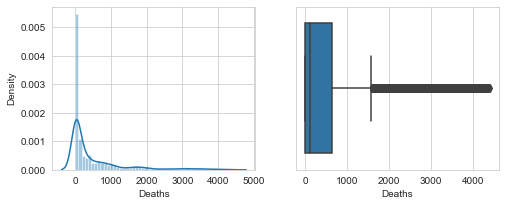

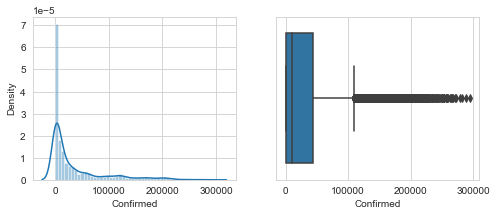

In [103]:
for cat in cont_num:
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  sns.distplot(df[cat])
  plt.subplot(1,2,2)
  sns.boxplot(df[cat])
  plt.show()

In [40]:
#Checking Outlier limits in CONFIRMED CASES
Q1=np.percentile(df['Confirmed'],25,interpolation='midpoint')
Q2=np.percentile(df['Confirmed'],50,interpolation='midpoint')
Q3=np.percentile(df['Confirmed'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR =', IQR)
print('The values less than',low_lim,'and the values greater than',up_lim,'are outliers.')

The Q1 value: 4387.0
The Q2 value: 40269.0
The Q3 value: 301280.5
IQR = 296893.5
The values less than -440953.25 and the values greater than 746620.75 are outliers.


In [41]:
out_index = df[(df.Confirmed>up_lim) | (df.Confirmed<low_lim)].index

print('There are',len(out_index),'outliers in Confirmed feature')
print('Outlier indexes are:',out_index)

There are 2313 outliers in Confirmed feature
Outlier indexes are: Int64Index([  504,   505,   506,   508,   510,   512,   514,   516,   519,
              520,
            ...
            18072, 18074, 18076, 18078, 18088, 18090, 18092, 18094, 18104,
            18106],
           dtype='int64', length=2313)


In [42]:
df.drop(index = list(out_index), inplace = True)

In [43]:
out_index = df[(df.Confirmed>up_lim) | (df.Confirmed<low_lim)].index

print('There are',len(out_index),'outliers in Confirmed feature')
print('Outlier indexes are:',out_index)

There are 0 outliers in Confirmed feature
Outlier indexes are: Int64Index([], dtype='int64')


In [44]:
#Checking Outlier limits in DEATHS
Q1=np.percentile(df['Deaths'],25,interpolation='midpoint')
Q2=np.percentile(df['Deaths'],50,interpolation='midpoint')
Q3=np.percentile(df['Deaths'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR =', IQR)
print('The values less than',low_lim,'and the values greater than',up_lim,'are outliers.')

The Q1 value: 15.0
The Q2 value: 329.0
The Q3 value: 1771.0
IQR = 1756.0
The values less than -2619.0 and the values greater than 4405.0 are outliers.


In [45]:
out_index = df[(df.Deaths>up_lim) | (df.Deaths<low_lim)].index

print('There are',len(out_index),'outliers in Deaths feature')
print('Outlier indexes are:',out_index)

There are 1666 outliers in Deaths feature
Outlier indexes are: Int64Index([  518,   535,   552,   569,   586,   603,   619,   620,   636,
              637,
            ...
            18084, 18086, 18096, 18097, 18098, 18099, 18100, 18102, 18108,
            18109],
           dtype='int64', length=1666)


In [46]:
df.drop(index = list(out_index), inplace = True)

In [47]:
out_index = df[(df.Deaths>up_lim) | (df.Deaths<low_lim)].index

print('There are',len(out_index),'outliers in Deaths feature')
print('Outlier indexes are:',out_index)

There are 0 outliers in Deaths feature
Outlier indexes are: Int64Index([], dtype='int64')


In [48]:
#Checking Outlier limits in CURED
Q1=np.percentile(df['Cured'],25,interpolation='midpoint')
Q2=np.percentile(df['Cured'],50,interpolation='midpoint')
Q3=np.percentile(df['Cured'],75,interpolation='midpoint')

print('The Q1 value:',Q1)
print('The Q2 value:',Q2)
print('The Q3 value:',Q3)

IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print('IQR =', IQR)
print('The values less than',low_lim,'and the values greater than',up_lim,'are outliers.')

The Q1 value: 1314.0
The Q2 value: 13065.5
The Q3 value: 81262.5
IQR = 79948.5
The values less than -118608.75 and the values greater than 201185.25 are outliers.


In [49]:
out_index = df[(df.Cured>up_lim) | (df.Cured<low_lim)].index

print('There are',len(out_index),'outliers in Cured feature')
print('Outlier indexes are:',out_index)

There are 1849 outliers in Cured feature
Outlier indexes are: Int64Index([  517,   534,   551,   568,   585,   602,   788,   805,   822,
              839,
            ...
            16054, 16056, 16060, 16061, 16694, 16712, 16730, 16748, 16765,
            16782],
           dtype='int64', length=1849)


In [50]:
df.drop(index = list(out_index), inplace = True)

In [51]:
out_index = df[(df.Cured>up_lim) | (df.Cured<low_lim)].index

print('There are',len(out_index),'outliers in Cured feature')
print('Outlier indexes are:',out_index)

There are 0 outliers in Cured feature
Outlier indexes are: Int64Index([], dtype='int64')


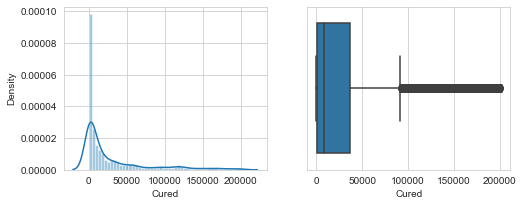

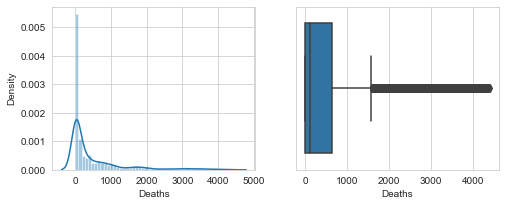

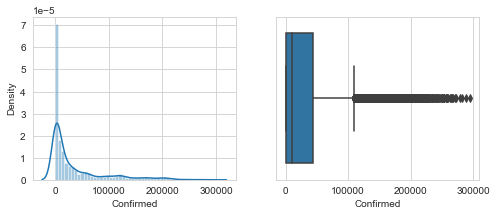

In [106]:
for cat in cont_num:
  plt.figure(figsize=(8,3))
  plt.subplot(1,2,1)
  sns.distplot(df[cat])
  plt.subplot(1,2,2)
  sns.boxplot(df[cat])
  plt.show()

Outliers are reduced for a large extend.

In [53]:
df

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,Cumsum_Confirmed,Cumsum_Deaths,Cumsum_Cured,Active,Month,Year
0,Andaman and Nicobar Islands,2021-01-01,4826.0,62.0,4945,4945,62.0,4.826000e+03,57.0,January,2021
1,Andaman and Nicobar Islands,2021-01-02,4928.0,62.0,4994,9939,124.0,9.754000e+03,61.0,January,2021
2,Andaman and Nicobar Islands,2021-01-03,4952.0,62.0,5020,14959,186.0,1.470600e+04,67.0,January,2021
3,Andaman and Nicobar Islands,2020-01-04,0.0,0.0,10,14969,186.0,1.470600e+04,77.0,January,2020
4,Andaman and Nicobar Islands,2021-01-04,4976.0,62.0,5083,20052,248.0,1.968200e+04,122.0,January,2021
...,...,...,...,...,...,...,...,...,...,...,...
18095,West Bengal,2020-08-30,127644.0,3126.0,156766,5444480584,73283831.0,5.039693e+09,331503298.0,August,2020
18101,West Bengal,2020-03-31,0.0,2.0,26,5446700367,73323652.0,5.041767e+09,331609344.0,March,2020
18103,West Bengal,2020-05-31,1970.0,309.0,5130,5447291430,73334288.0,5.042340e+09,331617498.0,May,2020
18105,West Bengal,2020-07-31,46256.0,1536.0,67692,5448725362,73351234.0,5.043642e+09,331732296.0,July,2020


# 3. Exploratory Data Analysis

In [54]:
# aggregating by month
month_total = df1.groupby("Month")["Confirmed"].aggregate(max)
month_total

Month
April        251371
August       281817
December     289202
February     251738
January      245859
July         266283
June         263115
March        257613
May          271810
November     279855
October      295132
September    258850
Name: Confirmed, dtype: int64

In [55]:
India_Total = df1.groupby("Date")["Cured","Deaths","Confirmed"].sum().reset_index()

In [56]:
India_Total

,Date,Cured,Deaths,Confirmed
0,2020-01-02,0.0,0.0,2
1,2020-01-03,0.0,0.0,3
2,2020-01-04,144.0,41.0,1834
3,2020-01-05,9065.0,1152.0,34972
4,2020-01-06,91819.0,5394.0,184905
...,...,...,...,...
555,2021-12-03,644308.0,8989.0,657962
556,2021-12-04,676458.0,9474.0,732037
557,2021-12-05,801139.0,14116.0,1060089
558,2021-12-06,758389.0,12277.0,824234


In [57]:
India_Total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       560 non-null    datetime64[ns]
 1   Cured      560 non-null    float64       
 2   Deaths     560 non-null    float64       
 3   Confirmed  560 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 17.6 KB


In [58]:
print('Total Cases in India as of 11th Aug, 2021 =',India_Total['Confirmed'].sum())

Total Cases in India as of 11th Aug, 2021 = 429443493


In [59]:
print('Total Deaths in India as of 11th Aug, 2021 =',India_Total['Deaths'].sum())

Total Deaths in India as of 11th Aug, 2021 = 6068872.0


## 3.1 Univariate Analysis

Let's have a look on the Confirmed covid cases in india from January 2020 to December 2021

In [109]:
fig = px.line(India_Total, x="Date", y="Confirmed", title='Confirmed Cases in India')
fig.show()

In [61]:
fig = px.line(India_Total, x="Date", y="Deaths", title='Deaths in India due to Covid-19')
fig.show()

In [62]:
fig = px.line(India_Total, x="Date", y="Cured", title='Cured Cases in India')
fig.show()

In [69]:
State_Total=pd.DataFrame(df.groupby("State/UnionTerritory")["Confirmed","Deaths","Cured"].sum()).sort_values("Confirmed",ascending=False).reset_index()

In [70]:
State_Total

,State/UnionTerritory,Confirmed,Deaths,Cured
0,Jammu and Kashmir,32199832,487704.0,28844282.0
1,Jharkhand,29393674,269277.0,26775180.0
2,Goa,28240159,447801.0,26027201.0
3,Himachal Pradesh,27753121,452518.0,25278264.0
4,Uttarakhand,23470176,375160.0,20586182.0
5,Gujarat,20347197,566701.0,17171150.0
6,Puducherry,20065891,312155.0,18483117.0
7,Madhya Pradesh,17544637,338597.0,15077636.0
8,Assam,15142825,55495.0,12508760.0
9,Haryana,14751657,160361.0,12760297.0


In [71]:
# creating a new dataframe that contains total cases
list1 = ["Confirmed", "Cured", "Deaths"]
list2 = [State_Total["Confirmed"].sum(axis=0), State_Total["Cured"].sum(axis=0), 
        State_Total["Deaths"].sum(axis=0)]
country_total = pd.DataFrame(list(zip(list1, list2)))
# adding column names to the dataframe
country_total.columns = ["Status", "Cases"]
country_total

,Status,Cases
0,Confirmed,429443493.0
1,Cured,365154435.0
2,Deaths,6068872.0


Text(0.5, 1.0, 'Comparison of Confirmed, Cured and Death cases in India')

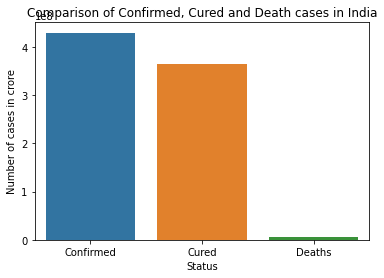

In [72]:
# comparing the number of confirmed, cured and death cases
sns.barplot(data=country_total, x="Status", y="Cases")
plt.xlabel("Status")
plt.ylabel("Number of cases in crore")
plt.title("Comparison of Confirmed, Cured and Death cases in India")

### 4.2. Multivariate Analysis

Text(0, 0.5, 'Number of cases in millions')

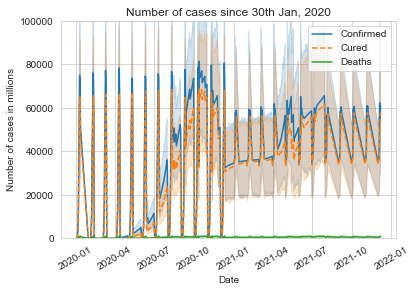

In [110]:
# plotting a time series graph of the number of cases
sns.lineplot(data=df, x="Date", y="Confirmed", label="Confirmed")
sns.lineplot(data=df, x="Date", y="Cured", label="Cured", linestyle="dashed")
sns.lineplot(data=df, x="Date", y="Deaths", label="Deaths")
plt.xticks(rotation=30)
plt.ylim((0, 100000))
plt.title("Number of cases since 30th Jan, 2020")
plt.ylabel("Number of cases in millions")

In [74]:
fig = px.bar(State_Total, x='State/UnionTerritory', y='Confirmed', height=900, color='Deaths', title='Cases per State')
fig.show()

In [75]:
fig = px.pie(State_Total, values='Confirmed', names='State/UnionTerritory', title='Percentage of Cases per State', height=900)
fig.show()

In [76]:
fig = px.pie(State_Total, values='Deaths', names='State/UnionTerritory', title='Percentage of Deaths per State', height=950)
fig.show()

Text(0.5, 1.0, 'Correlation of Confirmed, Cured and Deaths')

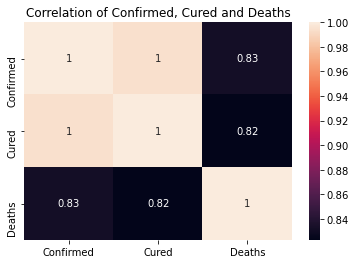

In [77]:
slice_data= State_Total[['Confirmed','Cured','Deaths']]
sns.heatmap(slice_data.corr(),annot=True)
plt.title("Correlation of Confirmed, Cured and Deaths")

In [78]:
df.columns

Index(['State/UnionTerritory', 'Date', 'Cured', 'Deaths', 'Confirmed',
       'Cumsum_Confirmed', 'Cumsum_Deaths', 'Cumsum_Cured', 'Active', 'Month',
       'Year'],
      dtype='object')

Text(0.5, 1.0, 'Correlation of All cases')

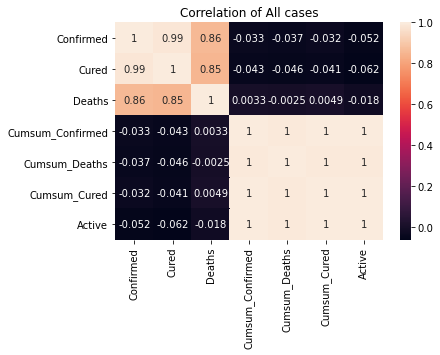

In [79]:
slice_data1= df[['Confirmed','Cured','Deaths','Cumsum_Confirmed', 'Cumsum_Deaths', 'Cumsum_Cured', 'Active']]
sns.heatmap(slice_data1.corr(),annot=True)
plt.title("Correlation of All cases")

Text(0.5, 1.0, 'Pairplot')

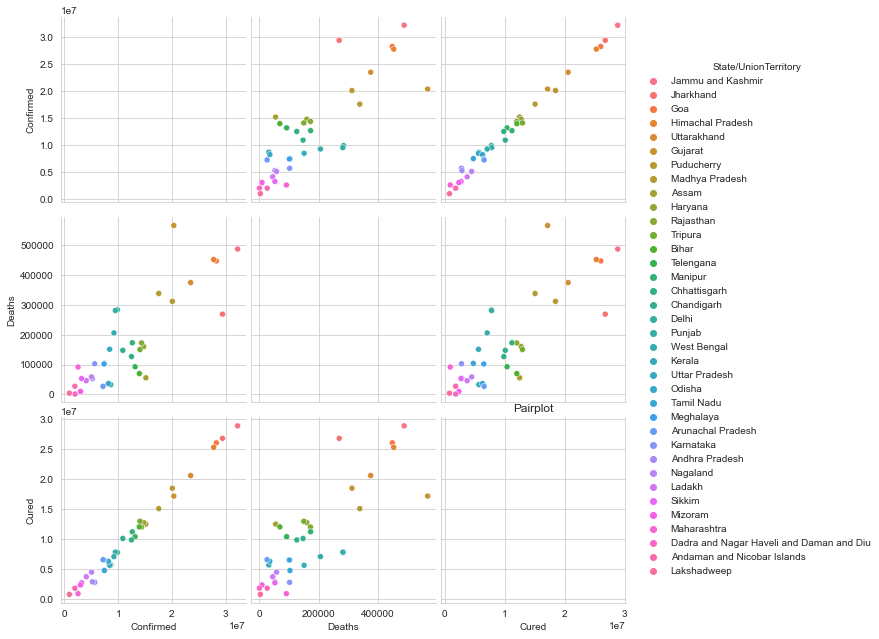

In [80]:
sns.set_style("whitegrid")
sns.pairplot(State_Total,hue="State/UnionTerritory",height=3)
plt.title("Pairplot")

# 4. Modelling

In [81]:
#spilitting data 
y=India_Total["Deaths"]
x=India_Total.drop(["Deaths","Date"],axis=1)

In [82]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)


### 1.Linear Regression

In [83]:

from sklearn import linear_model
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)

In [84]:
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,predictions))


MSE:  3497390.457939917


In [85]:
from sklearn.metrics import r2_score
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.9381913560311129


### 2.Random Forest Regressor

In [86]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
predictions=reg_rf.predict(x_test)

In [87]:
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  618930.971109286


In [88]:
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.9890617634791784


### 3.Decision Tree Regressor

In [90]:
from sklearn.tree import DecisionTreeRegressor
dt_model=DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
predictions=dt_model.predict(x_test)

In [91]:
print("MSE: ",mean_squared_error(y_test,predictions))

MSE:  1008511.3428571429


In [92]:
print("R square value: ",r2_score(y_test,predictions))

R square value:  0.9821767917311816


# 5.MODEL FINE TUNING

In [96]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(x_train, y_train)
predictions=reg_rf.predict(x_test)

In [97]:
print("MSE: ",mean_squared_error(y_test,predictions))
print("R square value: ",r2_score(y_test,predictions))

MSE:  570337.6308792855
R square value:  0.9899205433328022


## Conclusion
### from te above models its evident that random forest model with hyper parameter tuning gives the best fit it have the least MSE value (MSE=570337.6308792855) and maximum R square value (R-square-  0.9899205433328022)